# Load packages

In [7]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST train. test dataset 가져오기

In [8]:
mnist_train=dset.MNIST("", train=True,transform=transforms.ToTensor(),
                      target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False,transform=transforms.ToTensor(),
                     target_transform=None, download=True)

# 대략적인 데이터 형태

mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태:  torch.Size([1, 28, 28])
label:  5


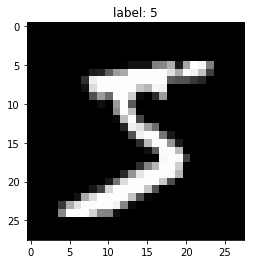

In [9]:
print "mnist_train 길이: ", len(mnist_train)
print "mnist_test 길이: ", len(mnist_test)

image, label = mnist_train.__getitem__(0)
print "image data 형태: ", image.size()
print "label: ", label

img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

# MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


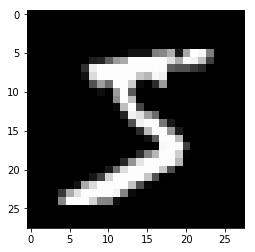

0


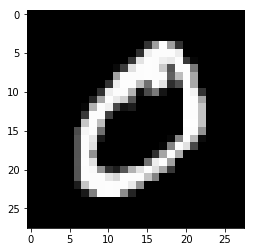

4


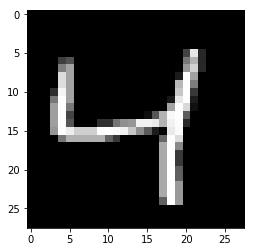

In [11]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

# convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


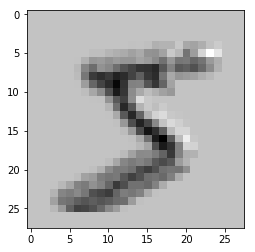

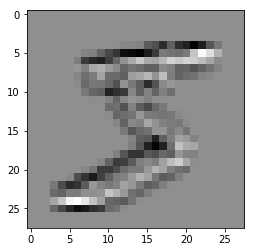

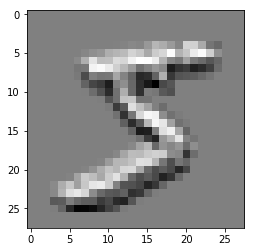

In [12]:
image, label = mnist_train[0]
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print label

conv_layer=nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3,padding=1)

output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray')
    plt.show()

# CNN 만들기

## train, test data 가져오기

In [15]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [16]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                         drop_last=True)

# CNN 클래스 만들기 (모델 만들기)

In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer=nn.Sequential(
             nn.Conv2d(1, 16, 5, padding=2),
             nn.ReLU(),
        
             nn.Conv2d(16, 32, 5, padding=2),
             nn.ReLU(),
             nn.MaxPool2d(2,2),
        
             nn.Conv2d(32, 64, 5, padding=2),
             nn.ReLU(),
             nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
             nn.Linear(64*7*7, 100),
             nn.ReLU(),
             nn.Linear(100, 10)
        )
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out
    
model = CNN()

In [19]:
for parameter in model .parameters():
    print(parameter)
    print(parameter.shape)

Parameter containing:
tensor([[[[-0.0484,  0.1107,  0.0675,  0.1335,  0.0523],
          [-0.1649, -0.1954,  0.0450, -0.0571, -0.0296],
          [-0.1654,  0.0703,  0.0490, -0.0939, -0.1553],
          [ 0.0184,  0.0859, -0.0313, -0.1981, -0.1992],
          [ 0.0674, -0.0758, -0.1490,  0.0509, -0.0996]]],


        [[[-0.0770, -0.1306, -0.0270,  0.1216,  0.1216],
          [ 0.1877, -0.1555, -0.0268, -0.1459, -0.1798],
          [ 0.1582,  0.1076, -0.1995, -0.0898,  0.1060],
          [ 0.1565,  0.1341,  0.0061,  0.0881, -0.0698],
          [-0.0734, -0.1599,  0.0948,  0.1984,  0.0183]]],


        [[[ 0.0933,  0.1366,  0.0186, -0.0206, -0.0503],
          [ 0.0443,  0.1154, -0.1392,  0.0193,  0.1678],
          [ 0.0927,  0.0080, -0.0574, -0.0347,  0.0337],
          [ 0.1826, -0.1469, -0.1568,  0.0138, -0.1911],
          [-0.0536, -0.0550,  0.0617,  0.1730, -0.1012]]],


        [[[-0.1260,  0.1630,  0.0367,  0.0825,  0.1870],
          [ 0.0837, -0.1408,  0.0040,  0.1023, -0.1493

In [20]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Optimization

In [22]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = Variable(image)
        y_ = Variable(label)
        
        optimizer.zero_grad()
        output=model(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()
        
        if j%50==0:
            print(loss, j, i)

(tensor(0.0075, grad_fn=<NllLossBackward>), 0, 0)
(tensor(0.0186, grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.0950, grad_fn=<NllLossBackward>), 0, 1)
(tensor(0.0072, grad_fn=<NllLossBackward>), 50, 1)
(tensor(0.0293, grad_fn=<NllLossBackward>), 0, 2)
(tensor(0.0061, grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.0256, grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.0974, grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.0003, grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.0106, grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.0029, grad_fn=<NllLossBackward>), 0, 5)
(tensor(6.4942e-05, grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.0463, grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.0100, grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0035, grad_fn=<NllLossBackward>), 0, 7)
(tensor(0.0020, grad_fn=<NllLossBackward>), 50, 7)
(tensor(0.0035, grad_fn=<NllLossBackward>), 0, 8)
(tensor(0.0069, grad_fn=<NllLossBackward>), 50, 8)
(tensor(0.0003, grad_fn=<NllLossBackward>), 0, 9)
(tensor(0.0007, grad_fn=<NllLossBackw

In [23]:
torch.save(model, 'nets/mycnn_model_%d.pkl'%(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [24]:
try:
    model=torch.load('nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [28]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total =0
    
    for j, [imgs, labels] in enumerate(dloader):
        img = Variable(imgs)
        label = Variable(labels)
        
        output = imodel.forward(img)
        _, output_index = torch.max(output, 1)
        
        total +=label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [29]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 95.6399993896
